c:\Users\moaan\OneDrive\Dokument\Machinelearning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.29

Classification Report:
               precision    recall  f1-score   support

    Clothing       0.28      0.32      0.30        77
 Electronics       0.29      0.42      0.34        81
   Groceries       0.22      0.14      0.17        66
      Health       0.35      0.24      0.28        76

    accuracy                           0.29       300
   macro avg       0.28      0.28      0.27       300
weighted avg       0.29      0.29      0.28       300



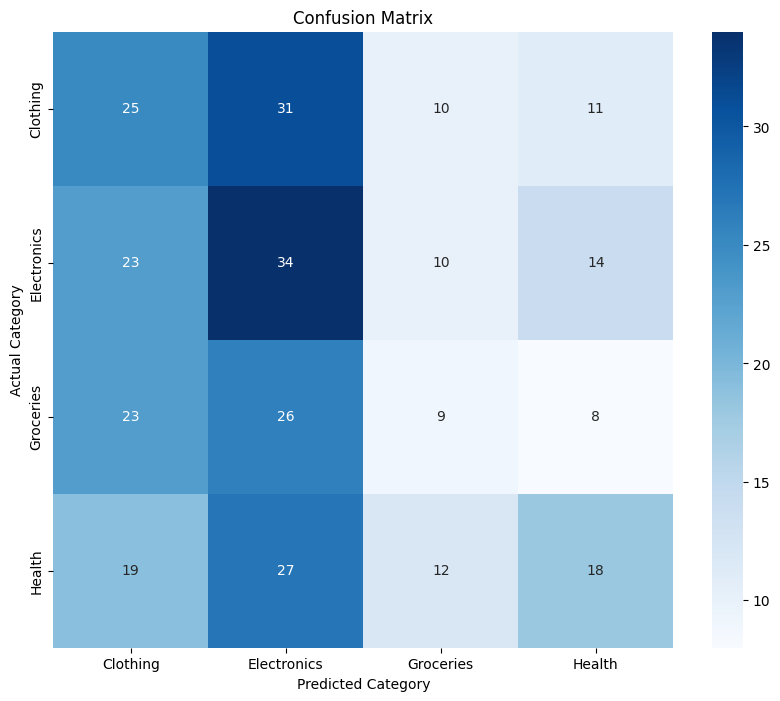

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


transactions = pd.read_json('transactions.json')

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['DayOfWeek'] = transactions['TransactionDate'].dt.dayofweek  # 0 = Monday, 6 = Sunday
transactions['Month'] = transactions['TransactionDate'].dt.month
transactions['Hour'] = transactions['TransactionDate'].dt.hour


X = transactions[['Amount', 'DayOfWeek', 'Month', 'Hour']]
y = transactions['Category'] #Target label column is Category

processed_transactions = transactions[['Amount', 'DayOfWeek', 'Month', 'Hour', 'Category']]
processed_transactions.to_csv('processed_transactions.csv', index=False)


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.show()
